In [12]:
import numpy as np
import matplotlib.pyplot as plt
from criticalZoom import critical_zoom 
from timebudget import timebudget
timebudget.set_quiet()  # don't show measurements as they happen
timebudget.report_at_exit()  # Generate report when the program exits
import pandas as pd


In [2]:
# this code searches for the critical point for a given lambda1 and ml
@timebudget
def critical_point_refined(lambda1,mu0,mu1,mu2,ml,tmin,tmax,numtemp,minsigma,maxsigma,mu_initial,delta_mu,mu_precision):
    mu=mu_initial
    #create a list to store the values of mu, Tc, and order
    mu_list=[]
    Tc_list=[]
    order_list=[]
    while round(delta_mu) >= mu_precision:
        print("current mu value is", mu)
        # see if the current mu value is in the list  mu_list
        if mu in mu_list:
            #find the index of the current mu value in the list
            index=mu_list.index(mu)
            #get the corresponding Tc and order values
            Tc=Tc_list[index]
            order=order_list[index]
            print("mu value already checked. Tc=",Tc,"order=",order)
        else:
            order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,mu0,mu1,mu2)
            #add the current mu value to the list
            mu_list.append(mu)
            #add the corresponding Tc and order values to the lists
            Tc_list.append(Tc)
            order_list.append(order)
            

        if mu==mu_initial and order==1:
            print(" no critical point. Transition is always first-order for mu greater than", mu_initial)
            break
        if order==1:
            mu=mu-delta_mu+delta_mu/2
            delta_mu=delta_mu/2
        else:
            mu=mu+delta_mu
    #find the maximum of the first element of sigma_list
    actual_max_sigma=np.amax(sigma_list[0][:,0])
    
    #create a dataframe to store the values of mu, Tc, and order
    df=pd.DataFrame({'mu':mu_list,'Tc':Tc_list,'order':order_list})
    #include  the other parameters in the dataframe
    df['lambda1']=lambda1
    df['ml']  = ml
    df['mu0'] = mu0
    df['mu1'] = mu1
    df['mu2'] = mu2
    df['mu_precision'] = mu_precision
    
    #pickle the dataframe with the values of ml, lambda1 in the filename
    df.to_pickle("data/phase_plot_zoom_mq_"+str(ml)+"_lambda_"+str(lambda1)+".pkl")
            
    return(mu,Tc,actual_max_sigma)



In [22]:
timebudget.report(reset=True)

timebudget report...
   critical_point_refined: 556290.52ms for      1 calls
            critical_zoom: 25285.90ms for     22 calls
  get_all_sigmas_parallel: 8714.54ms for     63 calls


In [23]:
#import the data from the pickle file
df=pd.read_pickle("data/phase_plot_zoom_mq_"+str(ml)+"_lambda_"+str(lambda1)+".pkl")
#find the indices where order is 2
index=np.where(np.array(df['order'])==2)
#find the corresponding mu values
mu_cross=np.array(df['mu'])[index]
#find the corresponding Tc values
Tc_cross=np.array(df['Tc'])[index]

#find the indices where order is 1
index=np.where(np.array(df['order'])==1)
#find the corresponding mu values
mu_1storder=np.array(df['mu'])[index]
#find the corresponding Tc values
Tc_1storder=np.array(df['Tc'])[index]

#plot the results
plt.scatter(mu_cross,Tc_cross,label='crossover')
plt.scatter(mu_1storder,Tc_1storder,label='1st order')
plt.xlabel('mu')
plt.xlabel('$\mu$ (MeV)')
plt.ylabel('$T$ (MeV)')
plt.title('$\lambda_1$='+str(lambda1)+' and $m_q$='+str(ml))
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/phase_plot_zoom_mq_40_lambda_0.2.pkl'

In [21]:
ml=40
lambda1=0.2
minsigma=0
maxsigma=500
tmin=60
tmax=240
numtemp=25


#dilaton parameters
mu0=430
mu1=830
mu2=176

mu=0
delta_mu=128
precision=4

mu,Tc,peaksigma=critical_point_refined(lambda1,mu0,mu1,mu2,ml,tmin,tmax,numtemp,minsigma,maxsigma,mu,delta_mu,precision)

print("critical point found at Tc=",Tc," and mu=",mu)

current mu value is 0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 157.5 187.5
Iteration number  1
Crossover or 2nd order
Pseudo-Critical temperature is between 176.25 181.25
Iteration number  2
Crossover or 2nd order
Pseudo-Critical temperature is between 178.54166666666666 179.375
Iteration number  3
Crossover or 2nd order
Pseudo-Critical temperature is between 178.85416666666666 178.99305555555554
Iteration number  4
Crossover or 2nd order
Pseudo-Critical temperature is between 178.90046296296296 178.9236111111111
Iteration number  5
Crossover or 2nd order
Pseudo-Critical temperature is between 178.90046296296296 178.90335648148147
Iteration number  6
Crossover or 2nd order
Pseudo-Critical temperature is between 178.90046296296296 178.90070408950618
Iteration number  7
current mu value is 128


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 157.5 187.5
Iteration number  1
Crossover or 2nd order
Pseudo-Critical temperature is between 172.5 177.5
Iteration number  2
Crossover or 2nd order
Pseudo-Critical temperature is between 174.58333333333334 175.41666666666666
Iteration number  3
Crossover or 2nd order
Pseudo-Critical temperature is between 174.86111111111111 175.0
Iteration number  4
Crossover or 2nd order
Pseudo-Critical temperature is between 174.98842592592592 175.0
Iteration number  5
Crossover or 2nd order
Pseudo-Critical temperature is between 174.99807098765433 175.0
Iteration number  6
Crossover or 2nd order
Pseudo-Critical temperature is between 174.99927662037038 174.99959812242798
Iteration number  7
current mu value is 256


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 142.5 172.5
Iteration number  1
Crossover or 2nd order
Pseudo-Critical temperature is between 160.0 165.0
Iteration number  2
Crossover or 2nd order
Pseudo-Critical temperature is between 162.70833333333334 163.54166666666666
Iteration number  3
Crossover or 2nd order
Pseudo-Critical temperature is between 163.05555555555554 163.19444444444446
Iteration number  4
Crossover or 2nd order
Pseudo-Critical temperature is between 163.11342592592592 163.13657407407408
Iteration number  5
Crossover or 2nd order
Pseudo-Critical temperature is between 163.1346450617284 163.13657407407408
Iteration number  6
Crossover or 2nd order
Pseudo-Critical temperature is between 163.13601144547326 163.13633294753086
Iteration number  7
Crossover or 2nd order
Pseudo-Critical temperature is between 163.1361052169067 163.136158800583
Iteration number  8
current mu value is 384


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 127.5 157.5
Iteration number  1
Crossover or 2nd order
Pseudo-Critical temperature is between 141.25 146.25
Iteration number  2
Crossover or 2nd order
Pseudo-Critical temperature is between 143.75 144.58333333333334
Iteration number  3
Crossover or 2nd order
Pseudo-Critical temperature is between 144.0625 144.20138888888889
Iteration number  4
Crossover or 2nd order
Pseudo-Critical temperature is between 144.0625 144.08564814814815
Iteration number  5
Crossover or 2nd order
Pseudo-Critical temperature is between 144.06635802469137 144.0702160493827
Iteration number  6
Crossover or 2nd order
Pseudo-Critical temperature is between 144.06684027777777 144.067483281893
Iteration number  7
current mu value is 512


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 97.5 127.5
Iteration number  1
Crossover or 2nd order
Pseudo-Critical temperature is between 116.25 121.25
Iteration number  2
Crossover or 2nd order
Pseudo-Critical temperature is between 119.16666666666667 120.0
Iteration number  3
Crossover or 2nd order
Pseudo-Critical temperature is between 119.51388888888889 119.65277777777779
Iteration number  4
Crossover or 2nd order
Pseudo-Critical temperature is between 119.53703703703704 119.56018518518519
Iteration number  5
Crossover or 2nd order
Pseudo-Critical temperature is between 119.54089506172839 119.54475308641976
Iteration number  6
Crossover or 2nd order
Pseudo-Critical temperature is between 119.54089506172839 119.54137731481481
Iteration number  7
current mu value is 640


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 75.0 105.0
Iteration number  1
Crossover or 2nd order
Pseudo-Critical temperature is between 88.75 93.75
Iteration number  2
Crossover or 2nd order
Pseudo-Critical temperature is between 90.83333333333333 91.66666666666667
Iteration number  3
Crossover or 2nd order
Pseudo-Critical temperature is between 91.14583333333333 91.28472222222223
Iteration number  4
Crossover or 2nd order
Pseudo-Critical temperature is between 91.14583333333333 91.1574074074074
Iteration number  5
Crossover or 2nd order
Pseudo-Critical temperature is between 91.14920910493827 91.15113811728395
Iteration number  6
current mu value is 768


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
Crossover or 2nd order
Pseudo-Critical temperature is between 61.25 63.75
Iteration number  2
Crossover or 2nd order
Pseudo-Critical temperature is between 62.5 62.916666666666664
Iteration number  3
Crossover or 2nd order
Pseudo-Critical temperature is between 62.5 62.53472222222222
Iteration number  4
Crossover or 2nd order
Pseudo-Critical temperature is between 62.5 62.50289351851852
Iteration number  5
Crossover or 2nd order
Pseudo-Critical temperature is between 62.50072337962963 62.50120563271605
Iteration number  6
current mu value is 896


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1024


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1152


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1280


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1408
Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1536
Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1664
Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1792
Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 1920
Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 2048
Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 2176
Crossover or 2nd order
Pseudo-Critical temperature is between 60.0 75.0
Iteration number  1
current mu value is 2304
Crossover or 2nd order
Pseudo-Critical temperature is between 60

Process SpawnPoolWorker-2840:
Process SpawnPoolWorker-2839:
Process SpawnPoolWorker-2838:
Process SpawnPoolWorker-2835:
Process SpawnPoolWorker-2831:
Process SpawnPoolWorker-2830:
Process SpawnPoolWorker-2832:
Process SpawnPoolWorker-2833:
Process SpawnPoolWorker-2824:
Process SpawnPoolWorker-2823:
Process SpawnPoolWorker-2826:
Process SpawnPoolWorker-2829:
Process SpawnPoolWorker-2836:
Process SpawnPoolWorker-2821:
Process SpawnPoolWorker-2825:
Process SpawnPoolWorker-2827:
Process SpawnPoolWorker-2837:
Process SpawnPoolWorker-2828:
Process SpawnPoolWorker-2834:
Process SpawnPoolWorker-2822:
Traceback (most recent call last):
  File "/Users/seanbartz/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/seanbartz/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/seanbartz/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 125, in worker


  File "/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/Exponential_dilaton/criticalZoom.py", line 161, in allSigmas
    chiFields=odeint(chiral,UVbound,u,args=(params,))
  File "/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/Exponential_dilaton/criticalZoom.py", line 55, in chiral
    def chiral(y,u,params):
  File "/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py", line 241, in odeint
    output = _odepack.odeint(func, y0, t, args, Dfun, col_deriv, ml, mu,
  File "/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/Exponential_dilaton/criticalZoom.py", line 64, in chiral
    phip = 2 * u * zh**2 * (mu0**2 + np.exp(-u**2 * zh**2 * mu2**2) * (mu0**2 + mu1**2) * (-1 + u**2 * zh**2 * mu2**2))
  File "/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/Exponential_dilaton/criticalZoom.py", line 63, in chiral
    phi = -(mu1*zh*u)**2+(mu0**2+mu1**2)*(zh**2)*(u**2)*(1-np.exp(-(mu2**2)*(zh**2)*(u**2)))
  File "/Users/seanbartz

KeyboardInterrupt: 

current mu value is 0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 5.101sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 3.648sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.11111111111111 157.22222222222223
Iteration number  2
get_all_sigmas_parallel took 3.019sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.57407407407408 156.75925925925927
Iteration number  3
get_all_sigmas_parallel took 2.195sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.65123456790124 156.6820987654321
Iteration number  4
get_all_sigmas_parallel took 1.851sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.66666666666669 156.6718106995885
Iteration number  5
get_all_sigmas_parallel took 1.693sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.67138203017834 156.6718106995885
Iteration number  6
get_all_sigmas_parallel took 1.571sec
Crossover or 2nd order
Pseudo-

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.859sec
Crossover or 2nd order
Pseudo-Critical temperature is between 148.33333333333334 155.0
Iteration number  1
get_all_sigmas_parallel took 3.635sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.22222222222223 153.33333333333334
Iteration number  2
get_all_sigmas_parallel took 3.090sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.82407407407408 153.00925925925927
Iteration number  3
get_all_sigmas_parallel took 2.125sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.90895061728395 152.9398148148148
Iteration number  4
get_all_sigmas_parallel took 1.734sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.92309670781893 152.92824074074073
Iteration number  5
get_all_sigmas_parallel took 1.701sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.92566872427983 152.92652606310014
Iteration number  6
get_all_sigmas_parallel took 1.656sec
Crossover or 2nd order
Pseud

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.830sec
Crossover or 2nd order
Pseudo-Critical temperature is between 138.33333333333334 145.0
Iteration number  1
get_all_sigmas_parallel took 3.503sec
Crossover or 2nd order
Pseudo-Critical temperature is between 141.66666666666669 142.77777777777777
Iteration number  2
get_all_sigmas_parallel took 3.018sec
Crossover or 2nd order
Pseudo-Critical temperature is between 142.17592592592592 142.36111111111111
Iteration number  3
get_all_sigmas_parallel took 2.153sec
First order
Critical temperature is  142.29166666666666
Iteration number  4
current mu value is 192.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.882sec
Crossover or 2nd order
Pseudo-Critical temperature is between 145.0 151.66666666666666
Iteration number  1
get_all_sigmas_parallel took 3.521sec
Crossover or 2nd order
Pseudo-Critical temperature is between 147.77777777777777 148.88888888888889
Iteration number  2
get_all_sigmas_parallel took 3.021sec
Crossover or 2nd order
Pseudo-Critical temperature is between 148.28703703703704 148.47222222222223
Iteration number  3
get_all_sigmas_parallel took 2.183sec
First order
Critical temperature is  148.38734567901236
Iteration number  4
current mu value is 160.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.793sec
Crossover or 2nd order
Pseudo-Critical temperature is between 146.66666666666666 153.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.659sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.27777777777777 151.38888888888889
Iteration number  2
get_all_sigmas_parallel took 3.057sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.74074074074073 150.92592592592592
Iteration number  3
get_all_sigmas_parallel took 2.190sec
First order
Critical temperature is  150.8641975308642
Iteration number  4
current mu value is 144.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.882sec
Crossover or 2nd order
Pseudo-Critical temperature is between 148.33333333333334 155.0
Iteration number  1
get_all_sigmas_parallel took 3.625sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.38888888888889 152.5
Iteration number  2
get_all_sigmas_parallel took 3.054sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.85185185185185 152.03703703703704
Iteration number  3
get_all_sigmas_parallel took 2.135sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.93672839506172 151.96759259259258
Iteration number  4
get_all_sigmas_parallel took 1.801sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.9457304526749 151.9508744855967
Iteration number  5
get_all_sigmas_parallel took 1.661sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.9483024691358 151.9491598079561
Iteration number  6
get_all_sigmas_parallel took 1.621sec
First order
Critical temperature is  151.948

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.936sec
Crossover or 2nd order
Pseudo-Critical temperature is between 148.33333333333334 155.0
Iteration number  1
get_all_sigmas_parallel took 3.635sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.94444444444446 153.05555555555557
Iteration number  2
get_all_sigmas_parallel took 3.035sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.36111111111111 152.5462962962963
Iteration number  3
get_all_sigmas_parallel took 2.196sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.43827160493828 152.46913580246914
Iteration number  4
get_all_sigmas_parallel took 1.806sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.4485596707819 152.4537037037037
Iteration number  5
get_all_sigmas_parallel took 1.599sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.45070301783264 152.45156035665295
Iteration number  6
get_all_sigmas_parallel took 1.657sec
Crossover or 2nd order
Pseudo-

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.856sec
Crossover or 2nd order
Pseudo-Critical temperature is between 148.33333333333334 155.0
Iteration number  1
get_all_sigmas_parallel took 3.526sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.66666666666669 152.77777777777777
Iteration number  2
get_all_sigmas_parallel took 2.998sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.08333333333334 152.26851851851853
Iteration number  3
get_all_sigmas_parallel took 2.149sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.18364197530866 152.21450617283952
Iteration number  4
get_all_sigmas_parallel took 1.844sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.20036008230454 152.20550411522635
Iteration number  5
get_all_sigmas_parallel took 1.815sec
Crossover or 2nd order
Pseudo-Critical temperature is between 152.20293209876544 152.20378943758575
Iteration number  6
get_all_sigmas_parallel took 1.615sec
Crossover or 2nd order
Pseu

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.395sec
Crossover or 2nd order
Pseudo-Critical temperature is between 146.66666666666666 153.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.542sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.0 151.11111111111111
Iteration number  2
get_all_sigmas_parallel took 3.039sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.50925925925927 150.69444444444446
Iteration number  3
get_all_sigmas_parallel took 2.257sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.59413580246914 150.625
Iteration number  4
get_all_sigmas_parallel took 1.687sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.59413580246914 150.59927983539094
Iteration number  5
get_all_sigmas_parallel took 1.601sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.5988511659808 150.59927983539094
Iteration number  6
get_all_sigmas_parallel took 1.662sec
Crossover or 2nd order
Pseudo-Critical 

get_all_sigmas_parallel took 2.996sec
Crossover or 2nd order
Pseudo-Critical temperature is between 130.1851851851852 130.37037037037038
Iteration number  3
get_all_sigmas_parallel took 2.141sec
Crossover or 2nd order
Pseudo-Critical temperature is between 130.2854938271605 130.31635802469137
Iteration number  4
get_all_sigmas_parallel took 1.806sec
Crossover or 2nd order
Pseudo-Critical temperature is between 130.29449588477368 130.2996399176955
Iteration number  5
get_all_sigmas_parallel took 1.650sec
Crossover or 2nd order
Pseudo-Critical temperature is between 130.29449588477368 130.29492455418384
Iteration number  6
get_all_sigmas_parallel took 1.592sec
Crossover or 2nd order
Pseudo-Critical temperature is between 130.29465663580248 130.29472808070417
Iteration number  7
current mu value is 390.0
mu value already checked. Tc= 121.66666666666667 order= 1
current mu value is 358.0
get_all_sigmas_parallel took 3.723sec
Crossover or 2nd order
Pseudo-Critical temperature is between 121

get_all_sigmas_parallel took 3.812sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 1871.0
get_all_sigmas_parallel took 3.630sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 1999.0
get_all_sigmas_parallel took 3.745sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 2127.0
get_all_sigmas_parallel took 3.549sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 2255.0
get_all_sigmas_parallel took 3.585sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 2383.0
get_all_sigmas_parallel took 3.571sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration numbe

get_all_sigmas_parallel took 3.465sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 8015.0
get_all_sigmas_parallel took 3.490sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 8143.0
get_all_sigmas_parallel took 4.329sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 8271.0
get_all_sigmas_parallel took 3.477sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 8399.0
get_all_sigmas_parallel took 3.282sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration number  1
current mu value is 8527.0
get_all_sigmas_parallel took 3.250sec
Crossover or 2nd order
Pseudo-Critical temperature is between 110.0 113.33333333333333
Iteration numbe

get_all_sigmas_parallel took 954.235sec
First order
Critical temperature is  58.333333333333336
Iteration number  1
current mu value is 8141.0
get_all_sigmas_parallel took 2.339sec
First order
Critical temperature is  58.333333333333336
Iteration number  1
current mu value is 8137.0
get_all_sigmas_parallel took 2.424sec
First order
Critical temperature is  58.333333333333336
Iteration number  1
critical_point_refined took 966.596sec
current mu value is 8130.0
get_all_sigmas_parallel took 2.372sec
First order
Critical temperature is  51.66666666666667
Iteration number  1
current mu value is 8066.0
get_all_sigmas_parallel took 2.291sec
First order
Critical temperature is  58.333333333333336
Iteration number  1
current mu value is 8034.0
get_all_sigmas_parallel took 2.476sec
First order
Critical temperature is  55.0
Iteration number  1
current mu value is 8018.0
get_all_sigmas_parallel took 2.323sec
First order
Critical temperature is  48.333333333333336
Iteration number  1
current mu val

get_all_sigmas_parallel took 2.411sec
First order
Critical temperature is  26.666666666666668
Iteration number  1
current mu value is 7086.0
get_all_sigmas_parallel took 2.394sec
Crossover or 2nd order
Pseudo-Critical temperature is between 25.0 31.666666666666668
Iteration number  1
current mu value is 7090.0
mu value already checked. Tc= 26.666666666666668 order= 1
critical_point_refined took 15.101sec
current mu value is 7083.0
get_all_sigmas_parallel took 2.396sec
First order
Critical temperature is  33.333333333333336
Iteration number  1
current mu value is 7019.0
get_all_sigmas_parallel took 2.351sec
First order
Critical temperature is  28.333333333333336
Iteration number  1
current mu value is 6987.0
get_all_sigmas_parallel took 2.393sec
Crossover or 2nd order
Pseudo-Critical temperature is between 23.333333333333336 30.0
Iteration number  1
current mu value is 7019.0
mu value already checked. Tc= 28.333333333333336 order= 1
current mu value is 7003.0
get_all_sigmas_parallel too

get_all_sigmas_parallel took 2.413sec
First order
Critical temperature is  15.0
Iteration number  1
critical_point_refined took 15.292sec
current mu value is 6000.0
get_all_sigmas_parallel took 2.333sec
First order
Critical temperature is  20.0
Iteration number  1
current mu value is 5936.0
get_all_sigmas_parallel took 2.406sec
First order
Critical temperature is  15.0
Iteration number  1
current mu value is 5904.0
get_all_sigmas_parallel took 2.429sec
First order
Critical temperature is  16.666666666666668
Iteration number  1
current mu value is 5888.0
get_all_sigmas_parallel took 2.536sec
First order
Critical temperature is  15.0
Iteration number  1
current mu value is 5880.0
get_all_sigmas_parallel took 2.562sec
First order
Critical temperature is  15.0
Iteration number  1
current mu value is 5876.0
get_all_sigmas_parallel took 2.426sec
First order
Critical temperature is  15.0
Iteration number  1
critical_point_refined took 15.338sec
current mu value is 5869.0
get_all_sigmas_parall

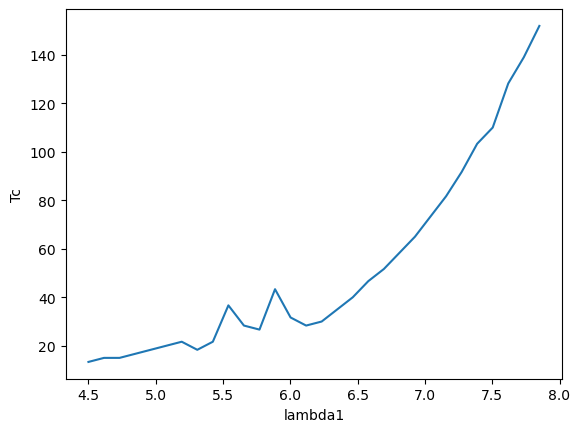

In [3]:
ml=24
a0=0
minsigma=0
maxsigma=400
tmin=120
tmax=160
numtemp=25
# create an array of lambda1 values, and find the critical point for each of them
lambda1_array=np.linspace(7.85, 4.5, 30)
Tc_array=np.zeros(len(lambda1_array))
mu_array=np.zeros(len(lambda1_array))
mu_precision=4
delta_mu=128
mu_min=0

for i in range(0,len(lambda1_array)):
    mu,Tc,sigma_peak=critical_point_refined(lambda1_array[i],ml,a0,tmin,tmax,numtemp,minsigma,maxsigma,mu_min,delta_mu,mu_precision)
    Tc_array[i]=Tc
    mu_array[i]=mu
    #adjust the search window for the next value
    mu_min=max(0,mu-5)
    if Tc<tmin+10:
        tmin=max(0,tmin-10)
        tmax=max(tmin+20,tmax-10)
    if sigma_peak+50<maxsigma:
        maxsigma=max(100,maxsigma-50)

plt.plot(lambda1_array,Tc_array)
plt.xlabel("lambda1")
plt.ylabel("Tc")
plt.show()

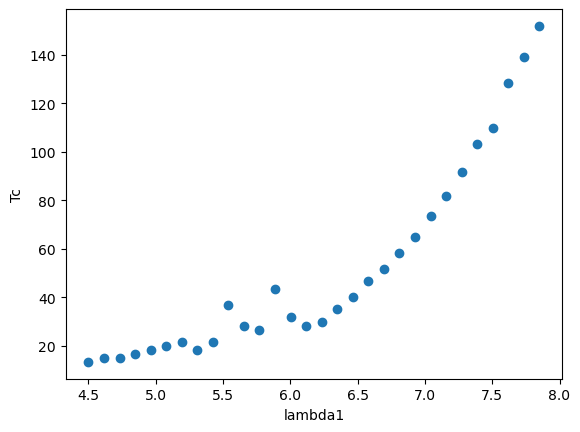

In [4]:
plt.scatter(lambda1_array,Tc_array)
plt.xlabel("lambda1")
plt.ylabel("Tc")
plt.show()

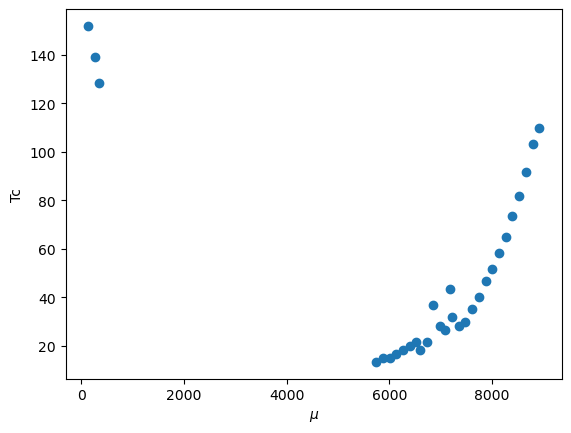

In [8]:
plt.scatter(mu_array,Tc_array)
plt.xlabel("$\mu$")
plt.ylabel("Tc")
plt.show()

In [6]:
Tc_array

array([151.94876686, 139.01727538, 128.22293905, 110.01736111,
       103.33333333,  91.66666667,  81.66666667,  73.33333333,
        65.        ,  58.33333333,  51.66666667,  46.66666667,
        40.        ,  35.        ,  30.        ,  28.33333333,
        31.66666667,  43.33333333,  26.66666667,  28.33333333,
        36.66666667,  21.66666667,  18.33333333,  21.66666667,
        20.        ,  18.33333333,  16.66666667,  15.        ,
        15.        ,  13.33333333])

In [9]:
mu_array

array([ 142.,  267.,  340., 8921., 8790., 8659., 8528., 8397., 8266.,
       8135., 8004., 7873., 7742., 7611., 7480., 7349., 7218., 7183.,
       7088., 6989., 6858., 6727., 6596., 6529., 6398., 6267., 6136.,
       6005., 5874., 5743.])